### Data Sets used in this tutorial courtesy of UCI Machine Learning Repository
Citation Request:
We suggest the following pseudo-APA reference format for referring to this repository:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
    
Dataset Found here: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [1]:
import pandas as pd
datapath = '../data_sets/'
sep = ','

In [2]:
### Download the Breast Cancer data set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
df = pd.read_csv(datapath+'breast_cancer.csv',sep=sep, index_col=None)
#df = pd.read_csv(datapath+'boston.csv',sep=sep, index_col=None)
df = df.sample(frac=1.0, random_state=0)
target = 'diagnosis'
print(df.shape)
df.head()

(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
512,89869,B,14.76,14.74,94.87,668.7,0.08875,0.07780,0.04608,0.03528,...,17.27,17.93,114.20,880.8,0.1220,0.2009,0.21510,0.12510,0.3109,0.08187
457,88147202,B,12.62,23.97,81.35,496.4,0.07903,0.07529,0.05438,0.02036,...,14.20,31.31,90.67,624.0,0.1227,0.3454,0.39110,0.11800,0.2826,0.09585
439,906878,B,13.66,19.13,89.46,575.3,0.09057,0.11470,0.09657,0.04812,...,15.14,25.50,101.40,708.8,0.1147,0.3167,0.36600,0.14070,0.2744,0.08839
298,901088,M,20.44,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.07785,...,24.31,26.37,161.20,1780.0,0.1327,0.2376,0.27020,0.17650,0.2609,0.06735
37,898690,B,11.47,16.03,73.02,402.7,0.09076,0.05886,0.02587,0.02322,...,12.51,20.79,79.67,475.8,0.1531,0.1120,0.09823,0.06548,0.2851,0.08763


In [3]:
num = int(0.9*df.shape[0])
train = df[:num]
test = df[num:]
sample_submission=''
scoring_parameter = ''

Train (Size: 512,32) has Single_Label with target: ['diagnosis']
"
 ################### Binary-Class ##################### " 
Shuffling the data set before training
 Class  -> Counts -> Percent
     B:     322  ->   62.9%
     M:     190  ->   37.1%
Selecting 2-Class Classifier...
    Using GridSearchCV for Hyper Parameter tuning...
String or Multi Class target: diagnosis transformed as follows: {'B': 0, 'M': 1}
Classifying variables in data set...
    Number of Numeric Columns =  30
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    31 Predictors classified...
        This does not include the Target column(s)
    1 variables rem

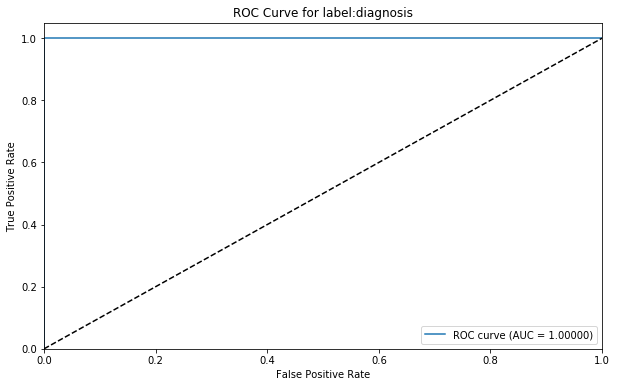

Average precision-recall score: 1.00
Macro F1 score, averaged over all classes: 1.00


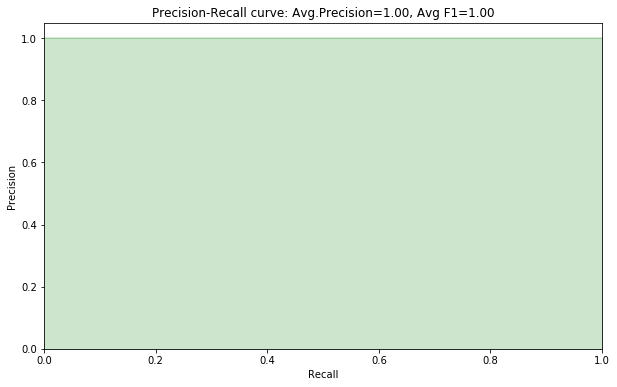

After multiple models, Ensemble Model Results:
    Accuracy Score = 98.1%
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.96      0.98        24

   micro avg       0.98      0.98      0.98        52
   macro avg       0.98      0.98      0.98        52
weighted avg       0.98      0.98      0.98        52

[[28  0]
 [ 1 23]]

Single Model is better than Ensembling Models for this data set.
    Time taken for this Target (in seconds) = 46
Plotting Feature Importances to explain the output of model

###################################################################################
Training model on complete Train data and Predicting using give Test Data...
Leaving Top 15 continuous variables as is...
    No Entropy Binning specified
Number of numeric variables = 15
    Number of variables removed due to high correlation = 4 
    Adding 0 categorical variables to reduced numeric variables  of 11


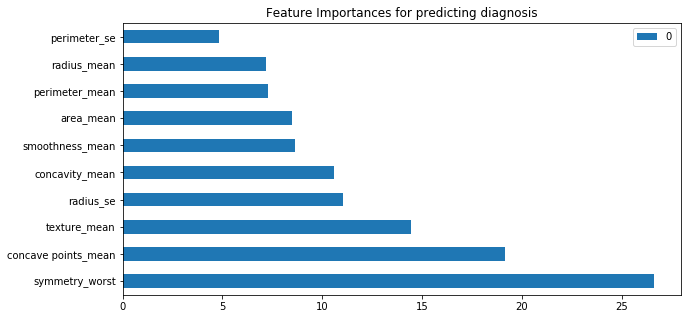

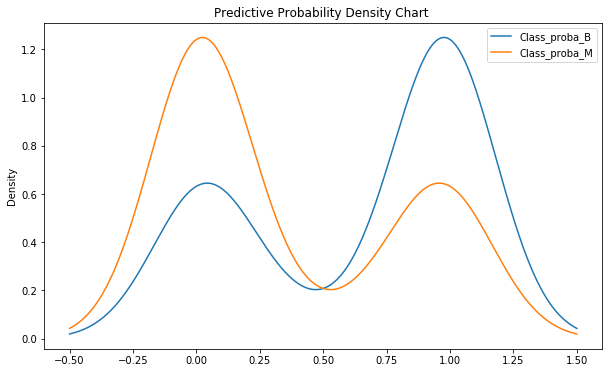

In [4]:
from autoviml.Auto_ViML import Auto_ViML
#### If Boosting_Flag = True => XGBoost, Fase=>ExtraTrees, None=>Linear Model
m, feats, trainm, testm = Auto_ViML(train, target, test, sample_submission,
                                    scoring_parameter=scoring_parameter,
                                    hyper_param='GS',feature_reduction=True,
                                     Boosting_Flag=None,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False, 
                                    Imbalanced_Flag=False, 
                                    verbose=1)                      

In [7]:
######## Use this to Test Classification Problems Only ####
modelname='Linear'
def accu(results, y_cv):
    return (results==y_cv).astype(int).sum(axis=0)/(y_cv.shape[0])
from sklearn.metrics import classification_report, confusion_matrix
try:
    print('Test results since target variable is present in test data:')
    modelname = 'Bagging'
    print(confusion_matrix(test[target].values,testm[target+'_'+modelname+'_predictions'].values))
    print('\nTest Accuracy = %0.2f%%\n' %(100*accu(test[target].values, testm[target+'_'+modelname+'_predictions'].values)))
    print(classification_report(test[target].values,testm[target+'_'+modelname+'_predictions'].values))
except:
    print('No target variable present in test data. No results')

Test results since target variable is present in test data:
[[35  0]
 [ 5 17]]

Test Accuracy = 91.23%

              precision    recall  f1-score   support

           B       0.88      1.00      0.93        35
           M       1.00      0.77      0.87        22

   micro avg       0.91      0.91      0.91        57
   macro avg       0.94      0.89      0.90        57
weighted avg       0.92      0.91      0.91        57

